In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models, datasets

# Load the MNIST dataset
(train_data, train_labels), (test_data, test_labels) = datasets.mnist.load_data()

# Concatenate the training and test sets
all_data = np.concatenate((train_data, test_data), axis=0)
all_labels = np.concatenate((train_labels, test_labels), axis=0)

# Normalize pixel values between 0 and 1
all_data = all_data / 255.0

# Split the combined dataset into train, validation, and test sets
data_train, data_temp, labels_train, labels_temp = train_test_split(all_data, all_labels, test_size=0.4, random_state=42)
data_val, data_test, labels_val, labels_test = train_test_split(data_temp, labels_temp, test_size=0.5, random_state=42)

# Reshape data for the neural network input
data_train = data_train.reshape(-1, 28, 28, 1)
data_val = data_val.reshape(-1, 28, 28, 1)
data_test = data_test.reshape(-1, 28, 28, 1)

In [6]:
print(all_data.shape[0])
print(data_train.shape[0])
print(data_val.shape[0])
print(data_test.shape[0])
print(labels_test.shape[0])
print(labels_train.shape[0])

70000
42000
14000
14000
14000
42000


In [7]:
# Build the CNN model
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax') 
])

model.summary()

c:\Users\Asus X513\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 149,642 (584.54 KB)

 Trainable params: 149,642 (584.54 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
learning_rate = 0.1

optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(data_train, labels_train, epochs=20, batch_size=1024, validation_data=(data_val, labels_val),verbose=2)

Epoch 1/20
42/42 - 19s - 458ms/step - accuracy: 0.1068 - loss: 49.2063 - val_accuracy: 0.1014 - val_loss: 2.3033
Epoch 2/20
42/42 - 20s - 483ms/step - accuracy: 0.1082 - loss: 2.3038 - val_accuracy: 0.1109 - val_loss: 2.3037
Epoch 3/20
42/42 - 19s - 445ms/step - accuracy: 0.1066 - loss: 2.3035 - val_accuracy: 0.1109 - val_loss: 2.3031
Epoch 4/20
42/42 - 16s - 384ms/step - accuracy: 0.1097 - loss: 2.3030 - val_accuracy: 0.1014 - val_loss: 2.3023
Epoch 5/20
42/42 - 20s - 468ms/step - accuracy: 0.1090 - loss: 2.3044 - val_accuracy: 0.1109 - val_loss: 2.3024
Epoch 6/20
42/42 - 19s - 448ms/step - accuracy: 0.1082 - loss: 2.3039 - val_accuracy: 0.0994 - val_loss: 2.3052
Epoch 7/20
42/42 - 19s - 441ms/step - accuracy: 0.1052 - loss: 2.3049 - val_accuracy: 0.0994 - val_loss: 2.3036
Epoch 8/20
42/42 - 21s - 511ms/step - accuracy: 0.1048 - loss: 2.3043 - val_accuracy: 0.0961 - val_loss: 2.3032
Epoch 9/20
42/42 - 20s - 485ms/step - accuracy: 0.1048 - loss: 2.3033 - val_accuracy: 0.1109 - val_loss

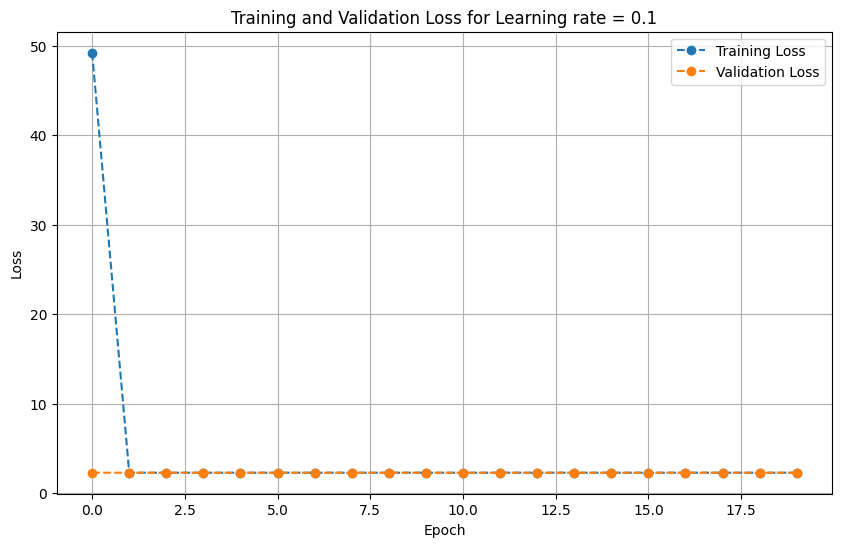

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', linestyle='--', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--', marker='o')
plt.title(f'Training and Validation Loss for Learning rate = {learning_rate}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

438/438 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step


c:\Users\Asus X513\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Asus X513\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Asus X513\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

              precision    recall  f1-score   support

           0       0.10      1.00      0.18      1419
           1       0.00      0.00      0.00      1607
           2       0.00      0.00      0.00      1403
           3       0.00      0.00      0.00      1437
           4       0.00      0.00      0.00      1326
           5       0.00      0.00      0.00      1249
           6       0.00      0.00      0.00      1351
           7       0.00      0.00      0.00      1488
           8       0.00      0.00      0.00      1319
           9       0.00      0.00      0.00      1401

    accuracy                           0.10     14000
   macro avg       0.01      0.10      0.02     14000
weighted avg       0.01      0.10      0.02     14000



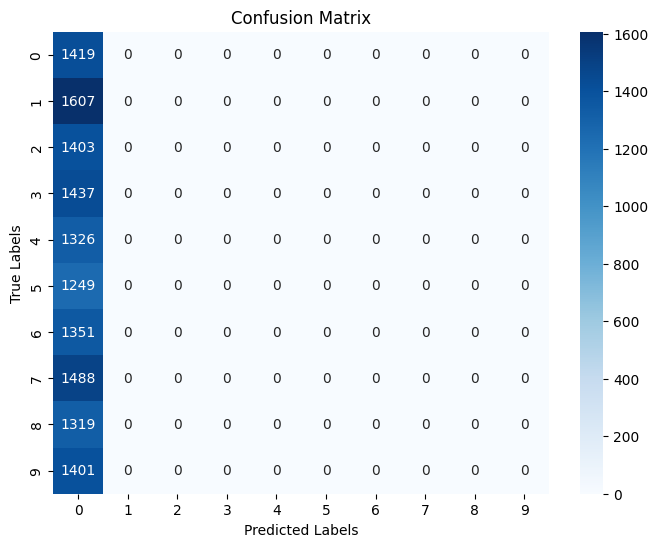

1313/1313 - 11s - 8ms/step - accuracy: 0.0982 - loss: 2.3059
Training Loss: 2.3059
Training Accuracy: 0.0982
438/438 - 3s - 7ms/step - accuracy: 0.1014 - loss: 2.3042
Test Loss: 2.3042
Test Accuracy: 0.1014


In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Get predictions from the model
pred = model.predict(data_test)

pred_classes = np.argmax(pred, axis=1)

print(classification_report(labels_test, pred_classes, digits=2))
conf_matrix = confusion_matrix(labels_test, pred_classes)

class_labels = [str(i) for i in range(10)]
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

train_loss, train_accuracy = model.evaluate(data_train, labels_train, verbose=2)
print(f"Training Loss: {train_loss:.4f}")
print(f"Training Accuracy: {train_accuracy:.4f}")

test_loss, test_accuracy = model.evaluate(data_test, labels_test, verbose=2)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


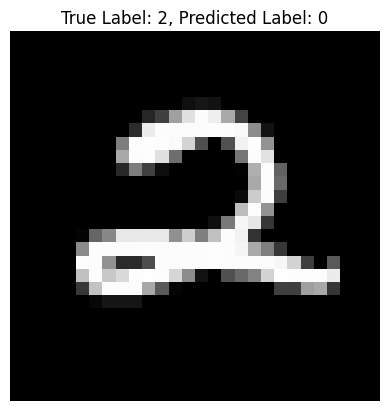

In [11]:
index = 50 
single_image = data_test[index]

# Reshape the image to fit the input shape of the CNN model (batch size of 1, height, width, channels)
single_image_reshaped = single_image.reshape(1, 28, 28, 1)


prediction = model.predict(single_image_reshaped)
predicted_class = np.argmax(prediction, axis=1)
true_class = labels_test[index]

# Display the image along with the predicted and true class
plt.imshow(single_image.reshape(28, 28), cmap='gray')
plt.title(f"True Label: {true_class}, Predicted Label: {predicted_class[0]}")
plt.axis('off')
plt.show()

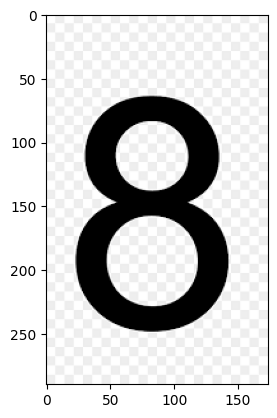

In [12]:
image = cv2.imread("C:/Users/Asus X513/Downloads/downloader.png")
plt.imshow(image)
plt.show()


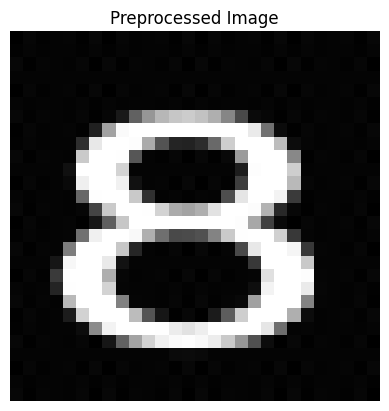

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predicted class: 0


In [13]:
def preprocess_image(image):
    gray = cv2.bitwise_not(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)) 
    resized = cv2.resize(gray, (28, 28), interpolation=cv2.INTER_AREA) 
    return resized / 255.0 

preprocessed_image = preprocess_image(image)
plt.imshow(preprocessed_image, cmap='gray')
plt.axis("off")
plt.title("Preprocessed Image")
plt.show()

input_image = preprocessed_image.reshape(1, 28, 28, 1)
predicted_class = np.argmax(model.predict(input_image), axis=1)[0]
print(f"Predicted class: {predicted_class}")
